In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
data = pd.read_csv(r"C:\Users\keert\Downloads\housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
data["total_bedrooms"].fillna(data["total_bedrooms"].mean(),inplace=True)


C:\Users\keert\AppData\Local\Temp\ipykernel_11360\1722177338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].mean(),inplace=True)


In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
data.drop_duplicates("total_bedrooms",inplace=True)

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20440,-118.77,34.24,6.0,16222.0,2309.0,6700.0,2080.0,6.4963,308100.0,<1H OCEAN
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,<1H OCEAN
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND


In [12]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
data=data[['housing_median_age', 'total_rooms', 
           'total_bedrooms', 'population', 'households', 'median_income', 
           'median_house_value']]

In [14]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [21]:
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

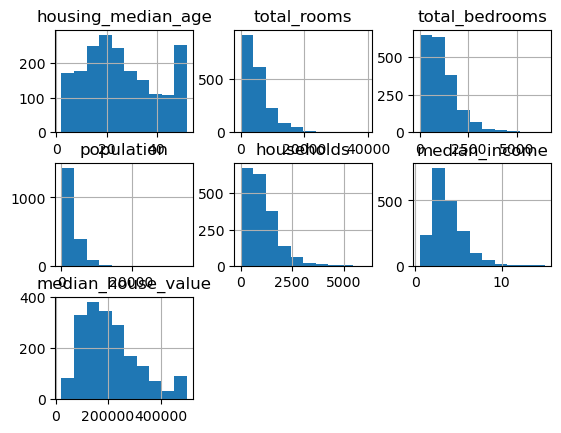

In [15]:
data.hist()

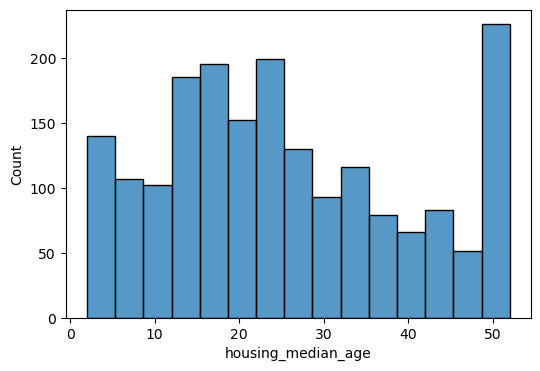

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data.housing_median_age)
plt.show()

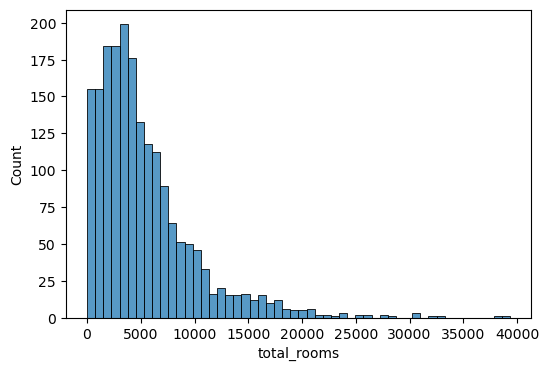

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data.total_rooms)
plt.show()

In [20]:
data.total_rooms.skew()

2.0949674786737584

In [25]:
data["updated_total_rooms"],lambda_val=boxcox(data.total_rooms)

C:\Users\keert\AppData\Local\Temp\ipykernel_11360\2857626973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["updated_total_rooms"],lambda_val=boxcox(data.total_rooms)


In [26]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,updated_total_rooms
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,23.651766
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,48.570652
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,28.332044
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,26.964159
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,29.375232
...,...,...,...,...,...,...,...,...
20440,6.0,16222.0,2309.0,6700.0,2080.0,6.4963,308100.0,63.937471
20451,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,73.901681
20530,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,62.328578
20544,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,52.188827


In [27]:
lambda_val

0.31462993231975384

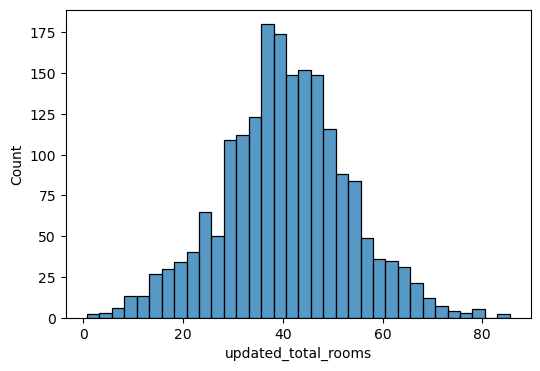

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_total_rooms)
plt.show()

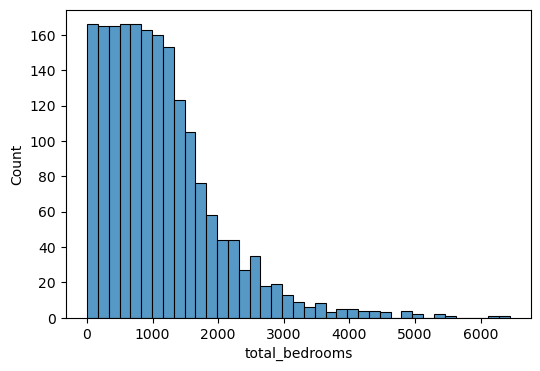

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(data.total_bedrooms)
plt.show()

In [30]:
data.total_bedrooms.skew()

1.5551673717920633

In [31]:
data["updated_total_bedrooms"],lambda_val=boxcox(data.total_bedrooms)

C:\Users\keert\AppData\Local\Temp\ipykernel_11360\2495435101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["updated_total_bedrooms"],lambda_val=boxcox(data.total_bedrooms)


In [32]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,updated_total_rooms,updated_total_bedrooms
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,23.651766,14.640102
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,48.570652,37.443059
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,28.332044,17.465025
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,26.964159,19.208605
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,29.375232,20.759412
...,...,...,...,...,...,...,...,...,...
20440,6.0,16222.0,2309.0,6700.0,2080.0,6.4963,308100.0,63.937471,50.859423
20451,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,73.901681,60.492854
20530,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,62.328578,56.709466
20544,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,52.188827,46.476837


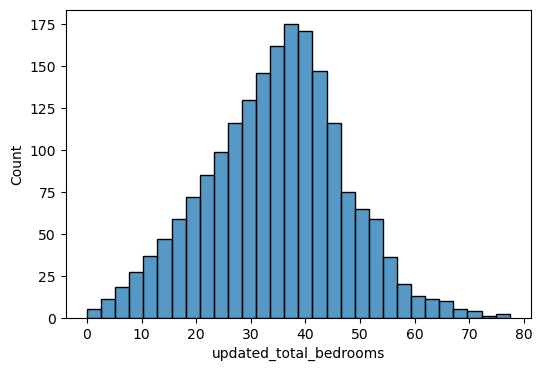

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_total_bedrooms)
plt.show()

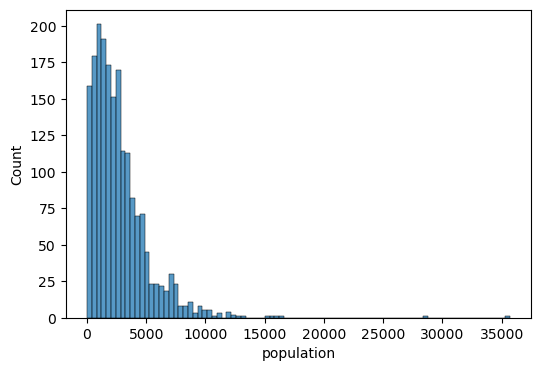

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(data.population)
plt.show()

In [35]:
data.population.skew()

3.256954043597479

In [36]:
data["updated_population"],lambda_val=boxcox(data.population)

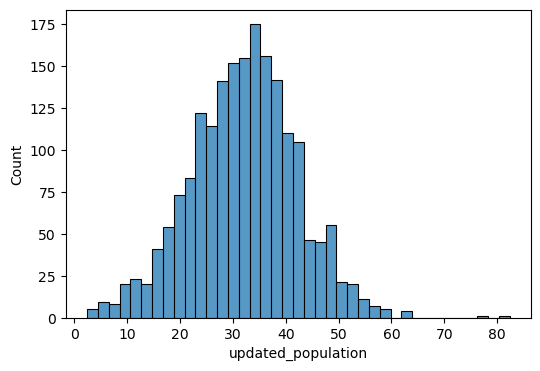

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_population)
plt.show()

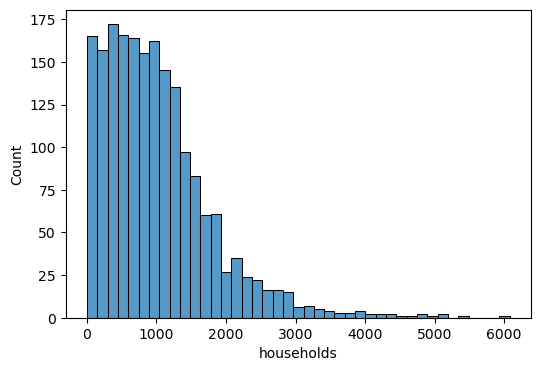

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(data.households)
plt.show()

In [39]:
data.households.skew()

1.5879983630531767

In [41]:
data["updated_households"],lambda_val=boxcox(data.households)

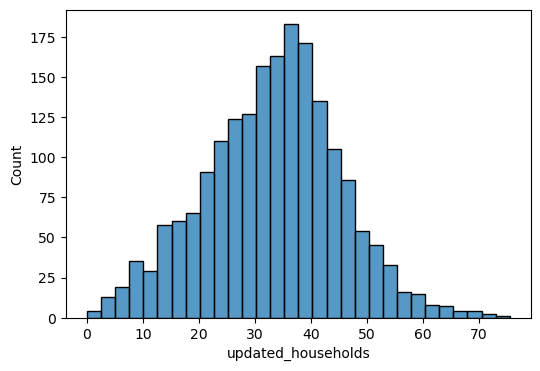

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_households)
plt.show()

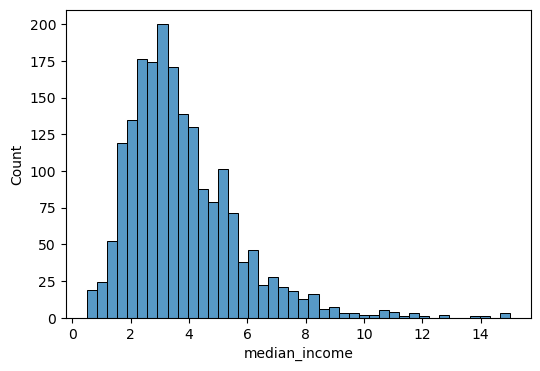

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(data.median_income)
plt.show()

In [45]:
data.median_income.skew()

1.5579527497575356

In [46]:
data["updated_median_income"],lambda_val=boxcox(data.median_income)

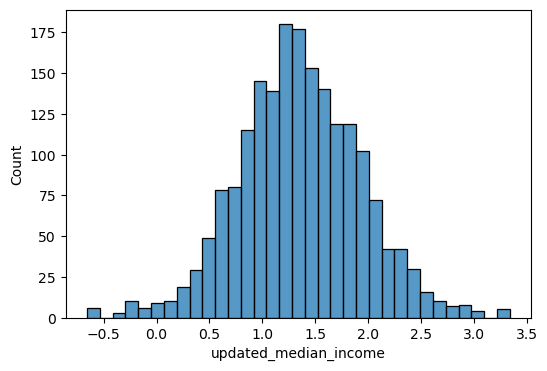

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_median_income)
plt.show()

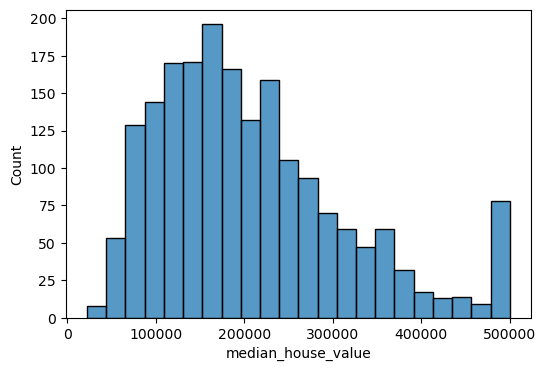

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(data.median_house_value)
plt.show()

In [49]:
data.median_house_value.skew()


0.9561336509326439

In [50]:
data["updated_median_house_value"],lambda_val=boxcox(data.median_house_value)

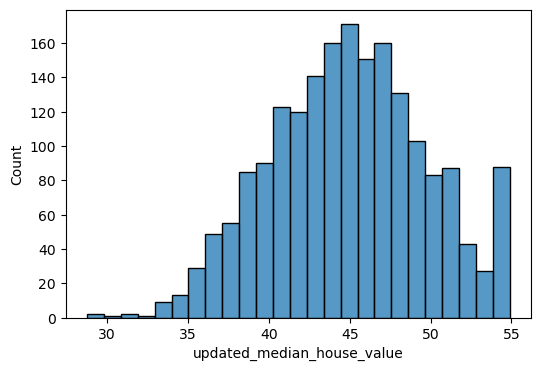

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_median_house_value)
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()
data["housing_median_age"]=scaler.fit_transform(data[["housing_median_age"]])
data["total_rooms"]=scaler.fit_transform(data[["total_rooms"]])
data["total_bedrooms"]=scaler.fit_transform(data[["total_bedrooms"]])
data["population"]=scaler.fit_transform(data[["population"]])
data["households"]=scaler.fit_transform(data[["households"]])
data["median_income"]=scaler.fit_transform(data[["median_income"]])
data["median_house_value"]=scaler.fit_transform(data[["median_house_value"]])

In [70]:
x=data[['housing_median_age', 'total_rooms', 
        'total_bedrooms', 'population', 'households', 'median_income']]
y=data["median_house_value"]

In [71]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.057524,-0.952079,-1.136626,-0.995557,-1.124571,2.404276
1,-0.314939,0.366735,-0.014630,-0.133802,0.158423,2.391687
2,1.812378,-0.827599,-1.066573,-0.923433,-1.059914,1.839463
3,1.812378,-0.868527,-1.014894,-0.897734,-1.006667,0.985581
4,1.812378,-0.793669,-0.963216,-0.894833,-0.955956,0.035111


In [72]:
x.shape,y.shape

((1924, 6), (1924,))

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
x_train.shape,x_test.shape

((1539, 6), (385, 6))

In [76]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [79]:
model.intercept_,model.coef_

(-0.006156969160903143,
 array([ 0.21048353, -0.52641159,  0.40508185, -0.32231175,  0.51951635,
         0.81012192]))

In [80]:
predicted_val=model.predict(x_test)

In [81]:
predicted_val

array([ 7.67397176e-01, -2.22061447e-01, -3.56176332e-01, -2.88911971e-01,
        6.85642873e-01, -2.80268816e-02,  1.23397147e-01, -3.56114547e-02,
        5.39365180e-01, -5.43842297e-01, -2.99594636e-01, -2.70196032e-02,
        1.79532191e+00,  2.17293108e-01,  2.14067994e-01,  6.80510563e-01,
        4.70941895e-01,  4.43234680e-01,  2.98541405e+00,  5.88397399e-01,
        1.03758807e+00,  9.75328490e-01,  1.68195673e+00,  4.21494687e-01,
       -1.41853253e-01,  9.43205541e-01, -5.11156542e-02,  6.89451436e-01,
       -6.66437408e-01, -2.23509684e-01,  1.10206641e-01,  1.18643741e+00,
       -2.95808076e-01,  6.36768522e-01, -5.45250154e-01,  9.05973232e-01,
       -3.07075675e-01, -9.72584631e-01, -6.12160100e-01,  3.86349710e-01,
        1.34136340e-01,  4.58239742e-01,  6.53903491e-01, -4.68615218e-01,
       -3.51222221e-01,  8.56296833e-01,  2.38710792e-01, -3.92433553e-01,
        6.23343375e-01, -9.58097642e-02, -5.70526047e-01, -5.11015111e-01,
       -6.40045257e-01, -

In [82]:
mean_squared_error(y_test,predicted_val)*100

49.918207386971424

In [83]:
r2_score(y_test,predicted_val)

0.5875243910122897